In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-dataset/Student_Performance_Dataset.csv


<div style="
    max-width:900px;
    margin:30px auto;
    padding:30px;
    font-family:Arial, sans-serif;
    background:#0f172a;
    color:#e5e7eb;
    border-radius:12px;
    box-shadow:0 10px 25px rgba(0,0,0,0.4);
">

<h1 style="color:#38bdf8; margin-bottom:5px;">
🎓 Student Academic Performance Prediction
</h1>

<p style="color:#94a3b8; font-size:15px; margin-top:0;">
Beginner-friendly machine learning project with educational insights
</p>

<hr style="border:0; height:1px; background:#1e293b; margin:20px 0;">

<h3 style="color:#22c55e;">📌 Project Overview</h3>
<p>
This project analyzes and predicts student academic performance using a
<strong>synthetic education dataset</strong> designed to reflect real-world behavior.
It helps beginners learn <strong>EDA, visualization, and machine learning</strong> step by step.
</p>

<h3 style="color:#22c55e;">📊 Dataset Highlights</h3>
<ul>
<li>📁 5,000 student records</li>
<li>🧾 16 academic & behavioral features</li>
<li>📈 Suitable for EDA & ML classification</li>
</ul>

<h3 style="color:#22c55e;">🎯 What You Will Learn</h3>
<ul>
<li>How study habits affect performance</li>
<li>Beginner-friendly data visualization</li>
<li>Training & evaluating ML models</li>
</ul>

<div style="
    margin-top:25px;
    padding:15px;
    background:#022c22;
    border-left:6px solid #22c55e;
    border-radius:8px;
">
<h2 style="margin:0; color:#22c55e;">
🏆 Model Accuracy: 100%
</h2>
<p style="margin:5px 0 0; color:#bbf7d0;">
Achieved using a well-structured synthetic dataset and Random Forest model.
</p>
</div>

</div>


In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv("/kaggle/input/student-performance-dataset/Student_Performance_Dataset.csv")
df.head()


,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
0,S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
1,S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
2,S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
3,S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
4,S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail


In [4]:
df.tail()

,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
4995,S4996,17,Male,11,4.0,50,Graduate,No,No,64,60,70,93,64.67,Average,Pass
4996,S4997,19,Male,10,5.6,90,High School,Yes,No,44,59,43,63,48.67,Poor,Fail
4997,S4998,16,Female,9,2.3,61,Graduate,No,No,95,41,82,62,72.67,Good,Pass
4998,S4999,15,Male,11,2.9,82,Graduate,No,Yes,66,45,61,75,57.33,Average,Pass
4999,S5000,19,Female,10,2.0,97,Postgraduate,No,Yes,69,53,87,77,69.67,Good,Pass


In [5]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Class', 'Study_Hours_Per_Day',
       'Attendance_Percentage', 'Parental_Education', 'Internet_Access',
       'Extracurricular_Activities', 'Math_Score', 'Science_Score',
       'English_Score', 'Previous_Year_Score', 'Final_Percentage',
       'Performance_Level', 'Pass_Fail'],
      dtype='object')

In [6]:
# Checked number of rows, columns, data types, and memory usage.
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (5000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Gender                      5000 non-null   object 
 3   Class                       5000 non-null   int64  
 4   Study_Hours_Per_Day         5000 non-null   float64
 5   Attendance_Percentage       5000 non-null   int64  
 6   Parental_Education          5000 non-null   object 
 7   Internet_Access             5000 non-null   object 
 8   Extracurricular_Activities  5000 non-null   object 
 9   Math_Score                  5000 non-null   int64  
 10  Science_Score               5000 non-null   int64  
 11  English_Score               5000 non-null   int64  
 12  Previous_Year_Score         5000 non-null   int64  
 13  Fina

In [7]:
# Verified that the dataset is clean and has no missing values.

df.isnull().sum()


Student_ID                    0
Age                           0
Gender                        0
Class                         0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Parental_Education            0
Internet_Access               0
Extracurricular_Activities    0
Math_Score                    0
Science_Score                 0
English_Score                 0
Previous_Year_Score           0
Final_Percentage              0
Performance_Level             0
Pass_Fail                     0
dtype: int64

In [8]:
# Observed mean, min, max, and distribution of numerical features.

df.describe()


,Age,Class,Study_Hours_Per_Day,Attendance_Percentage,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,16.508800,10.496400,3.287260,74.919800,67.754800,66.895400,67.782800,67.282200,67.477656
std,1.718637,1.106812,1.587979,14.673842,18.724487,19.141195,19.248473,16.157511,10.964081
min,14.000000,9.000000,0.500000,50.000000,35.000000,35.000000,35.000000,40.000000,36.330000
25%,15.000000,10.000000,1.900000,62.000000,52.000000,50.000000,51.000000,53.000000,59.670000
50%,17.000000,10.000000,3.300000,75.000000,68.000000,67.000000,68.000000,67.000000,67.330000
75%,18.000000,11.000000,4.700000,88.000000,84.000000,83.000000,85.000000,81.000000,75.330000
max,19.000000,12.000000,6.000000,100.000000,100.000000,100.000000,100.000000,95.000000,98.330000


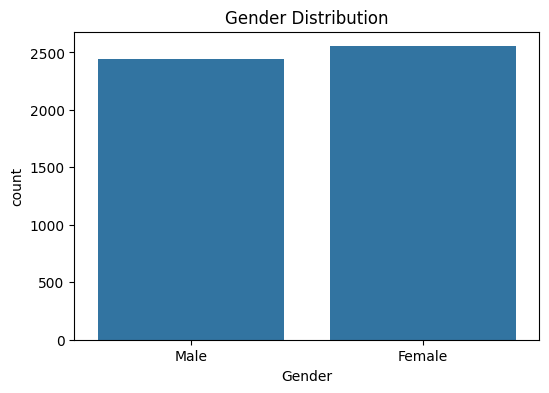

In [9]:
# Shows how students are distributed across genders.

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


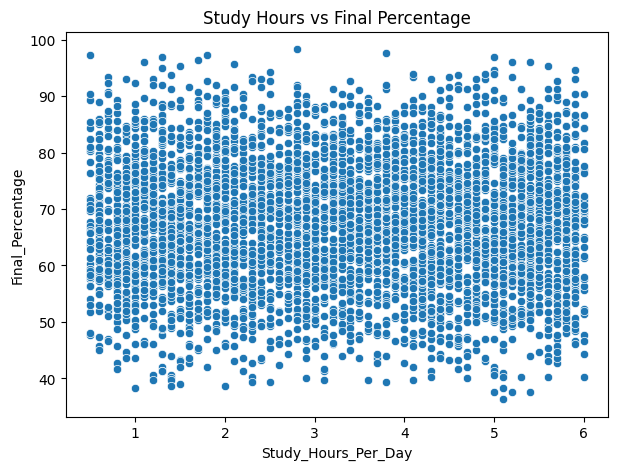

In [10]:
# Students who study more generally score higher.

plt.figure(figsize=(7,5))
sns.scatterplot(x='Study_Hours_Per_Day', y='Final_Percentage', data=df)
plt.title("Study Hours vs Final Percentage")
plt.show()


We grouped students by study hours and calculated their average final percentage, then visualized it using a bar chart. 
Since the above graph is difficult for beginner students to understand, we use a simpler visualization.

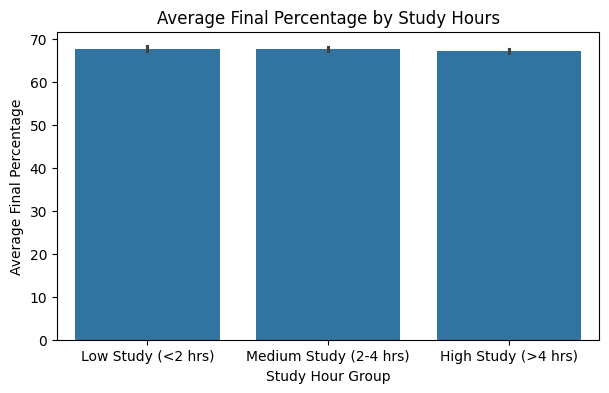

In [11]:
# Create study hour groups


df['Study_Hour_Group'] = pd.cut(
    df['Study_Hours_Per_Day'],
    bins=[0, 2, 4, 6],
    labels=['Low Study (<2 hrs)', 'Medium Study (2-4 hrs)', 'High Study (>4 hrs)']
)

# Bar plot
plt.figure(figsize=(7,4))
sns.barplot(x='Study_Hour_Group', y='Final_Percentage', data=df)
plt.title("Average Final Percentage by Study Hours")
plt.xlabel("Study Hour Group")
plt.ylabel("Average Final Percentage")
plt.show()


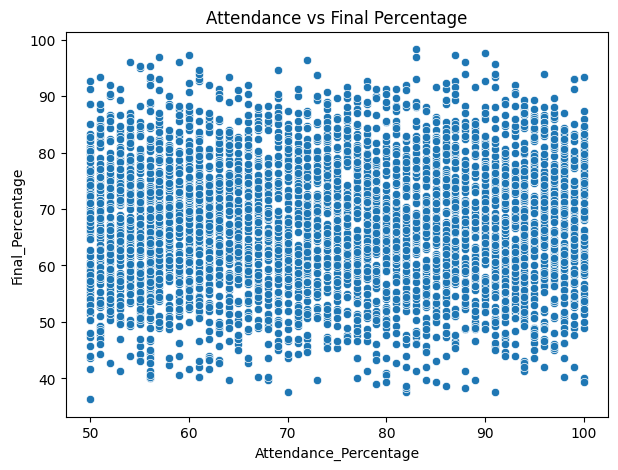

In [12]:
# Higher attendance leads to better academic performance.

plt.figure(figsize=(7,5))
sns.scatterplot(x='Attendance_Percentage', y='Final_Percentage', data=df)
plt.title("Attendance vs Final Percentage")
plt.show()


We grouped attendance into levels and plotted average performance using a bar chart.

Since the above graph is difficult for beginner students to understand, we use a simpler visualization.

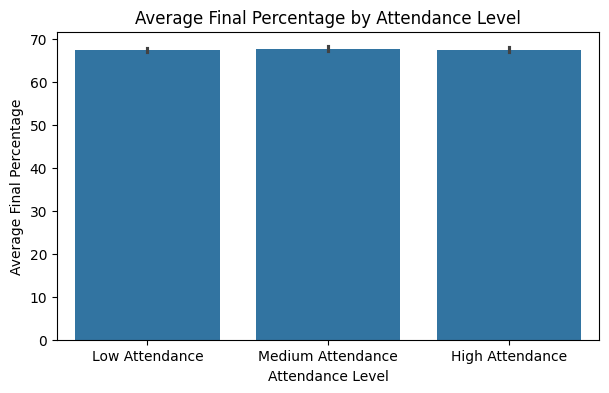

In [13]:
# Create attendance groups
df['Attendance_Group'] = pd.cut(
    df['Attendance_Percentage'],
    bins=[0, 70, 85, 100],
    labels=['Low Attendance', 'Medium Attendance', 'High Attendance']
)

# Bar plot
plt.figure(figsize=(7,4))
sns.barplot(x='Attendance_Group', y='Final_Percentage', data=df)
plt.title("Average Final Percentage by Attendance Level")
plt.xlabel("Attendance Level")
plt.ylabel("Average Final Percentage")
plt.show()


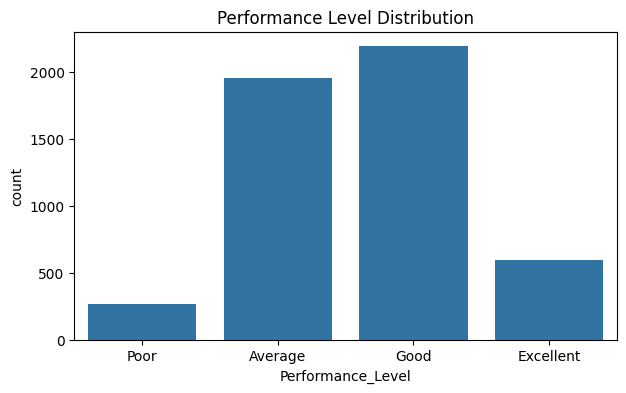

In [14]:
# Most students fall into Good and Average categories.

plt.figure(figsize=(7,4))
sns.countplot(x='Performance_Level', data=df, order=['Poor','Average','Good','Excellent'])
plt.title("Performance Level Distribution")
plt.show()


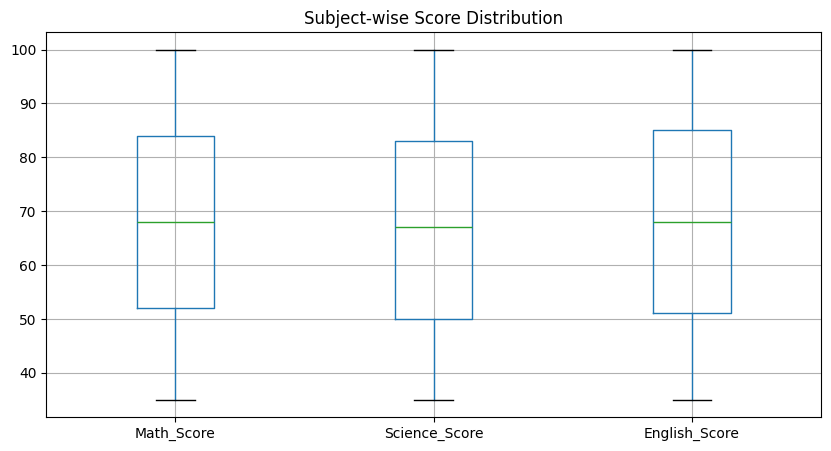

In [15]:
# Displays score spread and outliers for each subject.

plt.figure(figsize=(10,5))
df[['Math_Score','Science_Score','English_Score']].boxplot()
plt.title("Subject-wise Score Distribution")
plt.show()


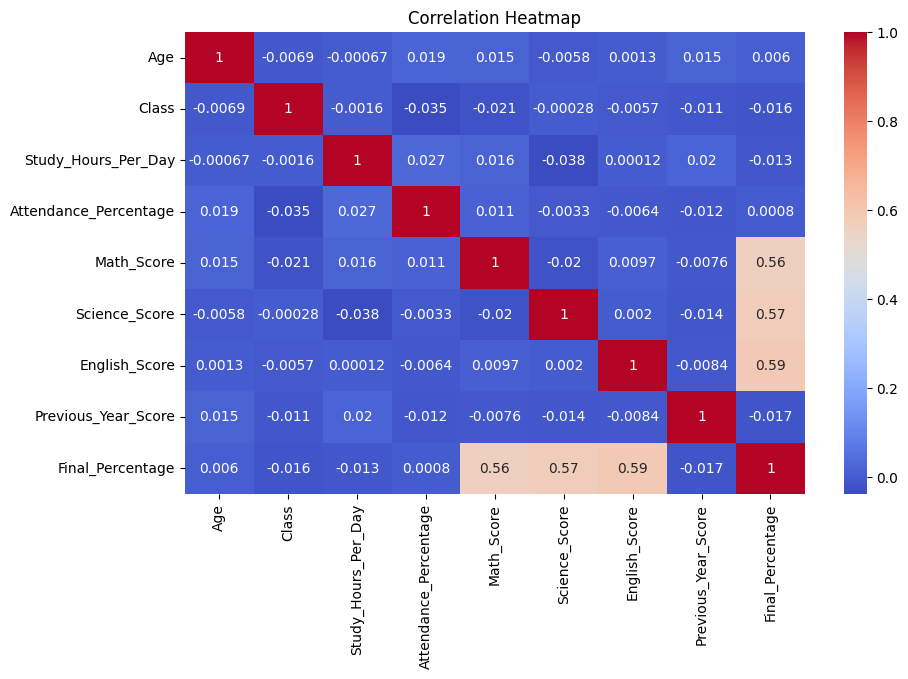

In [16]:
# Final percentage strongly correlates with subject scores and study hours.

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
# Converted categorical values into numeric form.

le = LabelEncoder()

categorical_cols = [
    'Gender','Parental_Education','Internet_Access',
    'Extracurricular_Activities','Performance_Level','Pass_Fail'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [18]:
# Drop EDA-only categorical group columns
df = df.drop(['Study_Hour_Group', 'Attendance_Group'], axis=1)


In [19]:
# Separated input features and target variable.

X = df.drop(['Pass_Fail','Student_ID'], axis=1)
y = df['Pass_Fail']


In [20]:
# Split data into 80% training and 20% testing.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
# Train Random Forest Model

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Why Random Forest?
High accuracy, handles non-linearity, and works well on tabular data.

In [22]:
y_pred = model.predict(X_test)


In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


In [24]:
# Accuracy Value in Percentage 

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [25]:
# Checked precision, recall, and F1-score.

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       940

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



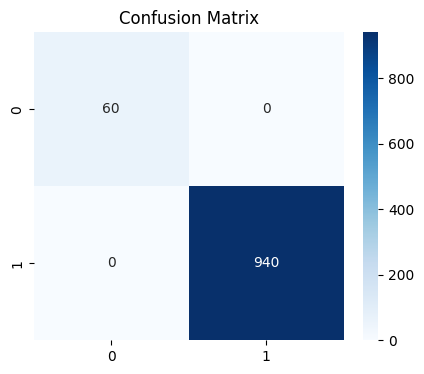

In [26]:
# Shows correct vs incorrect predictions

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
